# Direct Methods for the solution of Linear Systems

In [21]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [22]:
def compute(matrix_type, n_list):

    errors = []
    cond_nums_2 = []
    cond_nums_inf = []
    
    for n in n_list:

        A = create_matrix(matrix_type, n)
        x_true = np.ones((n,1)) #column vector
        
        # Compute the right-hand side of the linear system 
        # y = Ax_true(test problem).
        y = A@x_true

        # Computes the condition number in 2-norm of the 
        # matrix A. What if we use the infinite-norm instead 
        # of the 2-norm?
        cond_num_2 = np.linalg.cond(A, p=2)
        cond_nums_2.append(cond_num_2)

        cond_num_inf = np.linalg.cond(A, p=np.inf)
        cond_nums_inf.append(cond_num_inf)


        # Solve Ax = y the linear system with the 
        # function np.linalg.solve().
        x_computed = np.linalg.solve(A, y)

        #Compute the relative error between the computed solution and the true solution x_true
        rel_err = np.linalg.norm(x_true - x_computed, 2) / np.linalg.norm(x_true, 2)
        errors.append(rel_err)

    return cond_nums_2, cond_nums_inf, errors



def create_matrix(matrix_type, n): #create a Random/Vandermonde/Hilbert matrix of the specified dimension
    
    if matrix_type == 'Random':
        A = np.random.rand(n, n) #normal 0,1
    elif matrix_type == 'Vandermonde':
        x = np.linspace(1,n,num=n,dtype=int) #create the vector x = 1,2,...,n
        A = np.vander(x, n)
    elif matrix_type == 'Hilbert':
        A = scipy.linalg.hilbert(n)
    else:
        raise ValueError("matrix_type should be Random, Vandermonde or Hilbert")
    
    return A


def plot_errors(x_ax, y_ax):
    plt.plot(x_ax, y_ax)
    plt.grid(linestyle=':')
    plt.xlabel(r"$n$", size=14)
    plt.ylabel(r"$relative\_error$", size=14)
    plt.show()

def plot_cond_nums(n_list, cond_nums_2, cond_nums_inf):
    plt.semilogy(n_list, cond_nums_2)
    plt.semilogy(n_list, cond_nums_inf)
    plt.grid(linestyle=':')
    plt.legend([r"$\log k_2(A)$", r"$\log k_\infty(A)$"])
    plt.show()


## Random matrix test

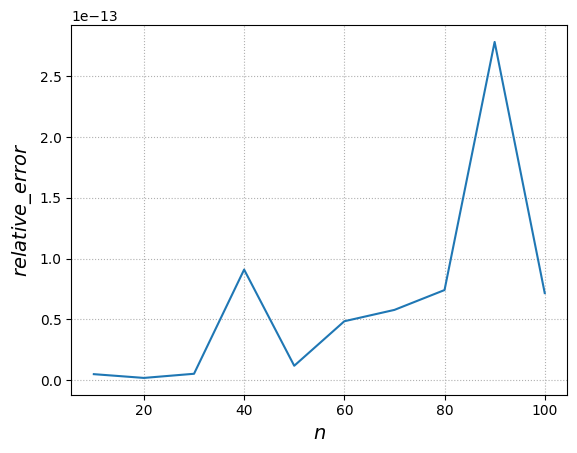

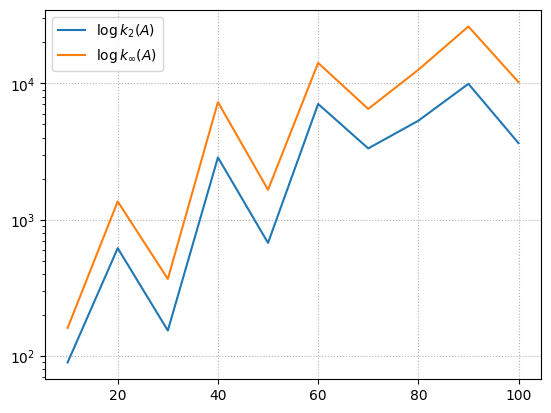

In [23]:
n_list = np.linspace(10,100,num=10, dtype=int)
cond_nums_2, cond_nums_inf, err = compute('Random', n_list)
plot_errors(n_list, err)
plot_cond_nums(n_list, cond_nums_2, cond_nums_inf)

## Vandermonde Matrix Test

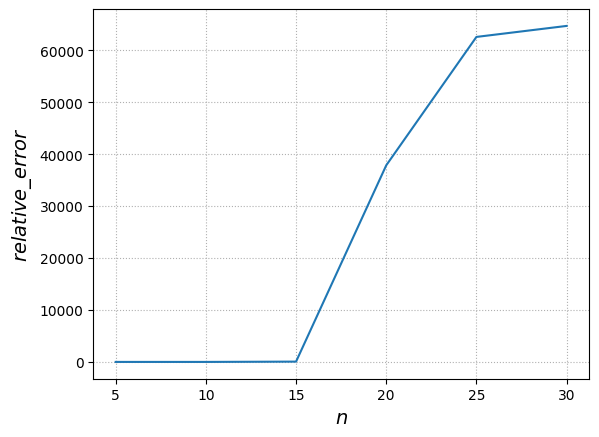

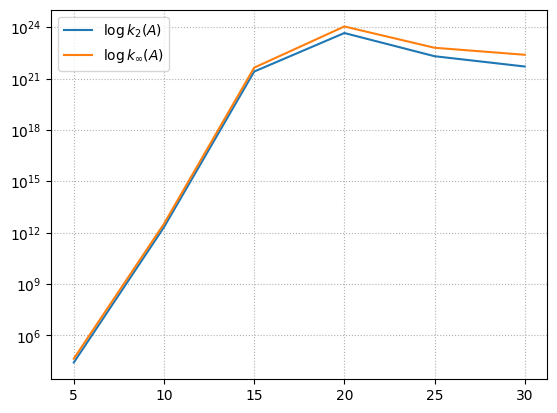

In [24]:
n_list = np.linspace(5,30,num=6, dtype=int)
cond_nums_2, cond_nums_inf, err = compute('Vandermonde', n_list)
plot_errors(n_list, err)
plot_cond_nums(n_list, cond_nums_2, cond_nums_inf)

## Hilbert Matrix Test

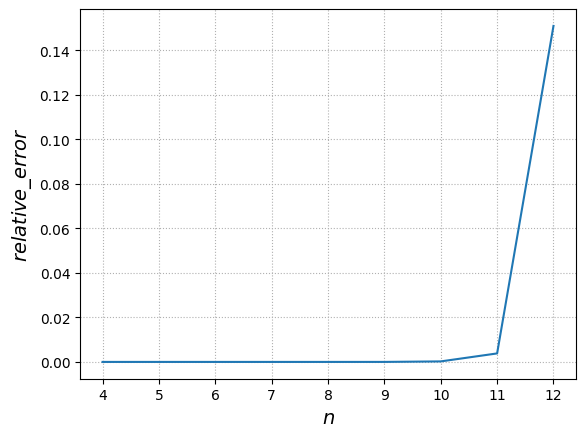

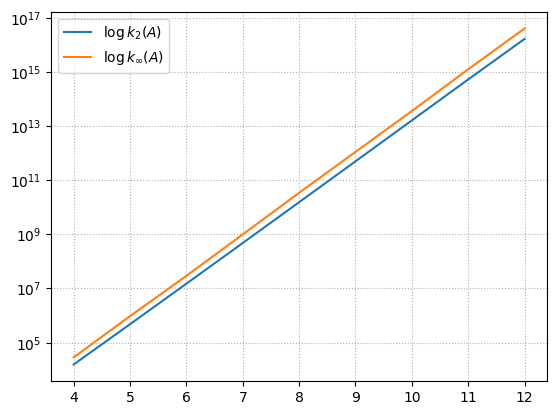

In [25]:
n_list = np.linspace(4,12,num=9, dtype=int)
cond_nums_2, cond_nums_inf, err = compute('Hilbert', n_list)
plot_errors(n_list, err)
plot_cond_nums(n_list, cond_nums_2, cond_nums_inf)

As we can see from the experiments above the hilbert matrix and the vandermonde matrix are ill-conditioned since the plot of their condition number in semilogy scale grows linearly with respect to n. The random matrix is not ill conditioned since its condition number keeps low even for large values of n.
We can also notice from the plots that the condition number compute in infinite norm has the same trend of the condition number computed in 2 norm due to the equivalence of norms. The infinite norm is a little bit higher than the 2 norm because it measures the maximum absolute row sum of the matrix (that is,  for each row, compute the sum of the absolute values of all the elements in that row and take the row with maximum value).
As we can see, the error of the hilbert matrix keeps low even if the matrix is ill-conditioned.